In [315]:
def generate_data_lr(N,d,sigma):
    # generate X uniform distributed between[0,1]
    X=np.random.uniform(0,1,size=(N,d))
    # generate noise normal distributed, mean 0, variance sigam^2
    noise=np.random.normal(0.0,sigma,(N,1))
    # add a collumnn of b so that the model is y=X*beta+b, 
    b=np.ones((N,1))
    X_modify=np.concatenate((X,b),axis=1)
    # generate hypothesis of the linear classification, it is d+1 dimension vector
    h=np.random.uniform(0,1.0,size=(d,1))
    # generate value of y if it is a linear regression problem
    y_linear=np.dot(X,h)
    # transform y_linear into a  0-1 label based on logistic regression model
    y=1 / (1 + np.exp(-y_linear))
    for i in range(0,N):
        e=np.random.uniform(0,1,size=(1,1))
        if y_linear[i,0]>= 1.2:
            y[i,0]=1
        else:
            y[i,0]=0    
    return X,y,h

#Initialize the number of samples, data points and noise level
N=10000
d=5
sigma=0.01
# generate data based on logistic regression model
[X_lr,y_lr,h_lr]=generate_data_lr(N,d,sigma)
print X_lr,y_lr
print np.mean(y_lr)
np.savetxt('X_lr.txt', X_lr, delimiter=',')
np.savetxt('y_lr.txt', y_lr, delimiter=',')
np.savetxt('h_lr.txt',h_lr,delimiter=',')

[[ 0.45327379  0.6701394   0.94114774  0.03358291  0.45941219]
 [ 0.48150002  0.18688388  0.25873685  0.78163028  0.72192797]
 [ 0.56436215  0.55828582  0.37439908  0.30584847  0.9766158 ]
 ..., 
 [ 0.80515387  0.4089481   0.88790438  0.91868577  0.84169766]
 [ 0.65450973  0.36756073  0.46903666  0.6107932   0.85718928]
 [ 0.99606748  0.44759338  0.40623341  0.89864633  0.98669777]] [[ 1.]
 [ 0.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]
0.4453


In [288]:
np.max(X_lr)

0.99997840655297943

In [181]:
import numpy as np
import math as math

'''
This function is to generate data with binary label, based on the model of Logistic Regression
'X' is sampled from a uniform distribution between [0,1]
hypothesis 'h' is generated from a integer uniform distribution between [-5,5]
the noise level 'sigma' is generated from a normal distribution with mean 0 and std sigma
label y is generated in the way below:
first generate y_linear=X*w+sigma as a linear problem
and then use logistic regression model to transform y_linear to a probability between [0,1]
and then generate a variable 'e' uniformly from [0,1], 
if y_linear>e ,set the label to be 1, otherwise set the label to be 0.

Input: number of samples N,dimension of data d, noise level sigma

Output: generate X, label y, realy hypothesis h
'''

def generate_data_lr(N,d,sigma):
    # generate X uniform distributed between[-1,1]
    X=np.random.uniform(-1,1,size=(N,d))
    # generate noise normal distributed, mean 0, variance sigam^2
    noise=np.random.normal(0.0,sigma,(N,1))
    # add a collumnn of b so that the model is y=X*beta+b, 
    b=np.ones((N,1))
    X_modify=np.concatenate((X,b),axis=1)
    # generate hypothesis of the linear classification, it is d+1 dimension vector
    h=np.random.uniform(-5.0,5.0,size=(d+1,1))
    # generate value of y if it is a linear regression problem
    y_linear=np.dot(X_modify,h)+noise
    # transform y_linear into a  0-1 label based on logistic regression model
    y=1 / (1 + np.exp(-y_linear))
    for i in range(0,N):
        e=np.random.uniform(0,1,size=(1,1))
        if y[i,0]>=e:
            y[i,0]=1
        else:
            y[i,0]=0
    
    return X,y,h





'''
function generate_cost_SampleGroup is to generate cost correlated with their group
first randomly assign a group label for each sample, 
In each group, the cost is a normal distribution with a specific mean and variance
Input:
'Group_Number' is a integer showing the number of groups
'Cost_Mean' is a 1-D vector contains the cost mean of each group
'Cost_Var' is a 1-D vector contains the cost variance of each group
'X' generated data
'cost_sg' is a sample
'''


def generate_cost_SampleGroup(Group_Number,Cost_Mean,Cost_Var,X):
    # number of samples
    N=X.shape[0]
    # initialize the cost vector of data
    cost_sg=np.zeros((N,1))
    # randomly assign group label for each sample
    group_label=np.random.randint(1,Group_Number,(N,1))
    # sample the cost for each sample
    for i in range(0,N):
        mean=Cost_Mean[int(group_label[i,0]),0];
        var=Cost_Var[int(group_label[i,0]),0];
        cost=np.random.normal(mean,var,1);
        cost_sg[i,0]=cost;
    
    cost_sg=cost_sg/np.sum(cost_sg, axis=0)*N
    return cost_sg

'''
function convex_cff and linear_cff are two functions that map a specific feature to a cost
Input 'a','b','c' the parameter in the function ,'x' the feature
'''

def convex_cff(a,b,c,x):
    cost=a*np.multiply(x,x)+b*x+c
    return cost

def linear_cff(a,b,x):
    cost=a*x+b
    return cost

'''
This function is for generate features correlated with features, 
Input: X, generated features
       coeff: cost function parameter for every feature,
       for exaple, if I use convex_cff, then for each feature i I have [coeff[i,0],coeff[i,1],coeff[i,2]]
       corresponding to a,b c in the function
       w: weight parameter for every features
Output: the normalized output cost correlated with features
'''


def generate_cost_Features(X,coeff,w):
    N=X.shape[0]
    d=X.shape[1]
    # calculate the cost for each features
    for i in range(0,d):
        X[:,i]=convex_cff(coeff[i,0],coeff[i,1],coeff[i,2],X[:,i])
    cost_fts=np.dot(X,w)
    # normalized cost, for each data set the total cost is the number of its data points
    cost_fts=cost_fts/np.sum(cost_fts, axis=0)*N
    return cost_fts

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

In [289]:
import numpy as np
import math as math

'''
This function is to generate data with binary label, based on the model of Logistic Regression
'X' is sampled from a uniform distribution between [0,1]
hypothesis 'h' is generated from a integer uniform distribution between [-5,5]
the noise level 'sigma' is generated from a normal distribution with mean 0 and std sigma
label y is generated in the way below:
first generate y_linear=X*w+sigma as a linear problem
and then use logistic regression model to transform y_linear to a probability between [0,1]
and then generate a variable 'e' uniformly from [0,1], 
if y_linear>e ,set the label to be 1, otherwise set the label to be 0.

Input: number of samples N,dimension of data d, noise level sigma

Output: generate X, label y, realy hypothesis h
'''

def generate_data_lr(N,d,sigma):
    # generate X uniform distributed between[-1,1]
    X=np.random.uniform(-1,1,size=(N,d))
    # generate noise normal distributed, mean 0, variance sigam^2
    noise=np.random.normal(0.0,sigma,(N,1))
    # add a collumnn of b so that the model is y=X*beta+b, 
    b=np.ones((N,1))
    X_modify=np.concatenate((X,b),axis=1)
    # generate hypothesis of the linear classification, it is d+1 dimension vector
    h=np.random.uniform(-5.0,5.0,size=(d+1,1))
    # generate value of y if it is a linear regression problem
    y_linear=np.dot(X_modify,h)+noise
    # transform y_linear into a  0-1 label based on logistic regression model
    y=1 / (1 + np.exp(-y_linear))
    for i in range(0,N):
        e=np.random.uniform(0,1,size=(1,1))
        if y[i,0]>=0.55:
            y[i,0]=1
        else:
            y[i,0]=0
    
    return X,y,h





'''
function generate_cost_SampleGroup is to generate cost correlated with their group
first randomly assign a group label for each sample, 
In each group, the cost is a normal distribution with a specific mean and variance
Input:
'Group_Number' is a integer showing the number of groups
'Cost_Mean' is a 1-D vector contains the cost mean of each group
'Cost_Var' is a 1-D vector contains the cost variance of each group
'X' generated data
'cost_sg' is a sample
'''


def generate_cost_SampleGroup(Group_Number,Cost_Mean,Cost_Var,X):
    # number of samples
    N=X.shape[0]
    # initialize the cost vector of data
    cost_sg=np.zeros((N,1))
    # randomly assign group label for each sample
    group_label=np.random.randint(1,Group_Number,(N,1))
    # sample the cost for each sample
    for i in range(0,N):
        mean=Cost_Mean[int(group_label[i,0]),0];
        var=Cost_Var[int(group_label[i,0]),0];
        cost=np.random.normal(mean,var,1);
        cost_sg[i,0]=cost;
    
    cost_sg=cost_sg/np.sum(cost_sg, axis=0)*N
    return cost_sg

'''
function convex_cff and linear_cff are two functions that map a specific feature to a cost
Input 'a','b','c' the parameter in the function ,'x' the feature
'''

def convex_cff(a,b,c,x):
    cost=a*np.multiply(x,x)+b*x+c
    return cost

def linear_cff(a,b,x):
    cost=a*x+b
    return cost

'''
This function is for generate features correlated with features, 
Input: X, generated features
       coeff: cost function parameter for every feature,
       for exaple, if I use convex_cff, then for each feature i I have [coeff[i,0],coeff[i,1],coeff[i,2]]
       corresponding to a,b c in the function
       w: weight parameter for every features
Output: the normalized output cost correlated with features
'''


def generate_cost_Features(X,coeff,w):
    N=X.shape[0]
    d=X.shape[1]
    J = X.copy()
    # calculate the cost for each features
    for i in range(0,d):
        J[:,i]=convex_cff(coeff[i,0],coeff[i,1],coeff[i,2],J[:,i])
    cost_fts=np.dot(X,w)
    # normalized cost, for each data set the total cost is the number of its data points
    cost_fts=cost_fts/np.sum(cost_fts, axis=0)*N
    return cost_fts


'''
main part of the data generating file
'''

# #Initialize the number of samples, data points and noise level
# N=10000
# d=5
# sigma=0.01
# # generate data based on logistic regression model
# [X_lr,y_lr,h_lr]=generate_data_lr(N,d,sigma)
# print X_lr,y_lr
# np.savetxt('X_lr.txt', X_lr, delimiter=',')
# np.savetxt('y_lr.txt', y_lr, delimiter=',')
# np.savetxt('h_lr.txt',h_lr,delimiter=',')

[[-0.61765532  0.26838608 -0.38171446 -0.67063965  0.03527408]
 [ 0.19440607  0.3651364  -0.72354598 -0.15975544  0.72854209]
 [-0.2664503   0.76683299 -0.55774793 -0.33905088  0.8895065 ]
 ..., 
 [-0.87348775  0.85660987 -0.53994199  0.26262396 -0.32660498]
 [-0.57492295 -0.49517425  0.74668969  0.24396318  0.51281383]
 [ 0.74333419 -0.9108543  -0.84782505  0.54799173 -0.78198953]] [[ 0.]
 [ 0.]
 [ 1.]
 ..., 
 [ 1.]
 [ 0.]
 [ 0.]]


In [141]:
#Initialize the number of samples, data points and noise level
N=10000
d=5
sigma=0.01
# generate data based on logistic regression model
[X_lr,y_lr,h_lr]=generate_data_lr(N,d,sigma)
print X_lr,y_lr
np.savetxt('X_lr.txt', X_lr, delimiter=',')
np.savetxt('y_lr.txt', y_lr, delimiter=',')
np.savetxt('h_lr.txt',h_lr,delimiter=',')

[[ 0.47617581  0.79347999  0.65698074 -0.33298017  0.03159344]
 [ 0.26211678  0.96874086 -0.44697624  0.51121342  0.5889732 ]
 [-0.96685305  0.20028892 -0.953653   -0.33013612 -0.69677522]
 ..., 
 [-0.65081358 -0.88545769  0.50651116 -0.16475792  0.97712451]
 [-0.86562012  0.6895071  -0.46203194  0.17617903 -0.84866722]
 [-0.96866192 -0.70149848 -0.83809632  0.11194179  0.76741621]] [[ 1.]
 [ 1.]
 [ 0.]
 ..., 
 [ 1.]
 [ 0.]
 [ 0.]]


In [390]:
def generate_cost_Features(X,coeff,w):
    N=X.shape[0]
    d=X.shape[1]
    J = X.copy()
    # calculate the cost for each features
    cost_fts=np.dot(X,w)
    # normalized cost, for each data set the total cost is the number of its data points
    #cost_fts=cost_fts/np.sum(cost_fts, axis=0)*N
    return cost_fts - np.mean(cost_fts) + 1

In [583]:
#Initialize the parameter for generate the cost correlated with sample groups
Group_Number=5;
#Cost_Mean=np.random.randint(5,10,(Group_Number,1))
r=1.0;
Cost_Mean=np.array([[5.0-2*r],[5.0-r],[5.0],[5.0+r],[5.0+2*r]])
sigma_cost=0.01
Cost_Var=sigma_cost*np.random.randint(1,5,(Group_Number,1))
cost_sg_5=generate_cost_SampleGroup(Group_Number, Cost_Mean,Cost_Var,X_lr)

r=2.0;
Cost_Mean=np.array([[5.0-2*r],[5.0-r],[5.0],[5.0+r],[5.0+2*r]])
cost_sg_10=generate_cost_SampleGroup(Group_Number, Cost_Mean,Cost_Var,X_lr)

r=3.0;
Cost_Mean=np.array([[5.0-2*r],[5.0-r],[5.0],[5.0+r],[5.0+2*r]])
cost_sg_15=generate_cost_SampleGroup(Group_Number, Cost_Mean,Cost_Var,X_lr)


r=4.0;
Cost_Mean=np.array([[5.0-2*r],[5.0-r],[5.0],[5.0+r],[5.0+2*r]])
cost_sg_20=generate_cost_SampleGroup(Group_Number, Cost_Mean,Cost_Var,X_lr)

In [588]:
np.mean(cost_sg_10)

1.0

In [511]:
#Initialize the parameter for generate the cost correlated with sample groups
Group_Number=5;
#Cost_Mean=np.random.randint(5,10,(Group_Number,1))
r=0.5;
Cost_Mean=np.array([[5.0-2*r],[5.0-r],[5.0],[5.0+r],[5.0+2*r]])
sigma_cost=0.01
Cost_Var=sigma_cost*np.random.randint(1,5,(Group_Number,1))
cost_sg_5=generate_cost_SampleGroup(Group_Number, Cost_Mean,Cost_Var,X_lr)

r=1.0;
Cost_Mean=np.array([[5.0-2*r],[5.0-r],[5.0],[5.0+r],[5.0+2*r]])
cost_sg_10=generate_cost_SampleGroup(Group_Number, Cost_Mean,Cost_Var,X_lr)

r=1.5;
Cost_Mean=np.array([[5.0-2*r],[5.0-r],[5.0],[5.0+r],[5.0+2*r]])
cost_sg_15=generate_cost_SampleGroup(Group_Number, Cost_Mean,Cost_Var,X_lr)


r=2.0;
Cost_Mean=np.array([[5.0-2*r],[5.0-r],[5.0],[5.0+r],[5.0+2*r]])
cost_sg_20=generate_cost_SampleGroup(Group_Number, Cost_Mean,Cost_Var,X_lr)

#Initialize the parameter for generate the cost correlated with features
#Group_Number=5;
coeff = h_lr
w=0.5*coeff
#w=np.random.uniform(0.0,1.0,(d,1))
cost_fts_5=generate_cost_Features(X_lr,coeff,w)
np.savetxt('cost_fts_05.txt', cost_fts_5, delimiter=',')

w=1.0*coeff
#w=np.random.uniform(0.0,1.0,(d,1))
cost_fts_10=generate_cost_Features(X_lr,coeff,w)
np.savetxt('cost_fts_10.txt', cost_fts_10, delimiter=',')

w=1.5*coeff
#w=np.random.uniform(0.0,1.0,(d,1))
cost_fts_15=generate_cost_Features(X_lr,coeff,w)

w=2.0*coeff
#w=np.random.uniform(0.0,1.0,(d,1))
cost_fts_20=generate_cost_Features(X_lr,coeff,w)


w=4.0*coeff
#w=np.random.uniform(0.0,1.0,(d,1))
cost_fts_40=generate_cost_Features(X_lr,coeff,w)


In [394]:
np.var(cost_fts_20)

0.57631783580624196

In [222]:
y_lr

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 1.],
       [ 0.],
       [ 1.]])

In [396]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [427]:
import random
import numpy as np 

class GradientDescent(object):
    """
    Implementation of a gradient descent algorithm for binary classification.
    The loss function is 1 if classified incorrectly, 0 if correctly,
      but use a hinge loss for training.
    Initialized with a list of digits to be labeled positively
      (all others negatively).
    The algorithm initializes self.w to be a vector of 0's.
    Then for each of a sequence of rounds, check if the loss is positive;
        if so do a gradient descent update.
    Supports methods:
        reset(eta)
        norm_grad_loss(x, y)
        test_error(X, Y)
        data_update(x, y, importance_wt)
        null_update()
    """
    def __init__(self, num_features, pos_labels, eta=0.1):
        # num_features = length of the x vector
        # pos_labels   = list of digits in [0,9] to label positively (others negatively)
        self.num_features = num_features
        self.binarized_labels = [-1.0, 1.0]
        self.reset(eta)
        super(GradientDescent, self).__init__()

    def reset(self, eta):
        self.eta = eta
        self.w = np.zeros(self.num_features)
        self.avg_w = self.w
        self.steps = 0
    
    # predict on only a single datapoint, using avg_w
    def _predict_one(self,x):
        return np.sign(self.avg_w.dot(x))

    # predict on a matrix of data (shape is numdata * numfeatures)
    def _predict(self,X):
        Ypreds = np.apply_along_axis(self._predict_one, 1, X)
        return Ypreds

    # predict and report error on data (shape is numdata * numfeatures)
    def test_error(self, X, Y):
        Ypred = self._predict(X)
        return np.mean(map(lambda y : self.binarized_labels[y], Y) != Ypred)

    def _loss(self,x,biny):
        score = self.w.dot(x) * biny
        return max(1. - score, 0.)

    def _grad_loss(self, x, biny):
        # gradient of the loss
        loss = self._loss(x,biny)
        if loss > 0.:
            return -biny * x
        return np.zeros(self.num_features)

    def norm_grad_loss(self, x, y):
        # l2 norm of the gradient of the loss
        return np.linalg.norm(self._grad_loss(x,self.binarized_labels[y]))

    def _step(self):
        # every step, whether we got a data_update or a null_update, we need to
        # step the average
        self.avg_w = (self.avg_w * self.steps + self.w) / float(self.steps + 1.0)
        self.steps += 1

    # Do an importance-weighted gradient descent update on the hypothesis
    def data_update(self, x, y, importance_wt):
        biny = self.binarized_labels[y]
        loss = self._loss(x,biny)
        if loss > 0.:
            step = self.eta * self._grad_loss(x, biny)
            self.w = self.w - step / importance_wt
        self._step()

    # Do an update with no new data
    def null_update(self):
        self._step()



In [512]:
import random
import numpy as np 

# Rather than initializing with prior knowledge, we simply estimate gamma
# online with a simple heuristic and set the normalizer K accordingly.

# Estimating gamma:
# We are using an importance-weighted estimate of gamma from the past data, i.e:
#   gamma = (1/(# steps))*(sum_{t < now} {0 if we did not observe t,  else this_round_gamma / q_t}
# where this_round_gamma = Delta(h_t,loss(.,z_t)) * (2sqrt(cmax) - sqrt(max(c*, c_t)))
# and   q_t = Pr[ we posted a price higher than c_t for z_t ].

# We also allow for discounting of past data by use of a discount factor.
# This allows for forgetting past data as things change. Thus, the actual estimate is
#   numerator = sum_{t <= s} discount^{s-t} {0 if not observe t, else .... }
#   denominator = sum_{t <= s} discount^{s-t}
#   gamma = numerator / denominator
# For the paper we used discount=1, which reduces to the first, simpler estimator.

# We initialize the numerator by 0 and denominator by a + b * T^c,
# which is intended to act as a regularizer so we start with some momentum to buy points
# and slowly decrease the buying rate as appropriate.


INIT_GAMMA_A = 10.0
INIT_GAMMA_B = 0.00001
INIT_GAMMA_C = 0.1
DISCOUNT = 1.0  # a discount factor for estimating gamma, if < 1, then old data is slowly forgotten

class OurMech(object):
    """
    This is our mechanism.
    It is initialized for either the usual setting (default),
  or "at-cost" (pay only the cost rather than your posted price).
    """
    def __init__(self, alg, seed, T=1, B=1, eta=0.1, cmax=1.0, atcost = False):
        self.alg = alg
        self.randgen = random.Random(seed)
        self.atcost = atcost
        self.reset(eta, T, B, cmax=cmax)
        super(OurMech, self).__init__()

    # cmax = maximum cost
    def reset(self, eta, T, B, cmax = 1.0):
        self.T = T
        self.B = B
        self.cmax = cmax
        self.spend = 0
        self.step = 0
        self.gamma_num = 0.0  # numerator
        self.gamma_den = INIT_GAMMA_A + INIT_GAMMA_B * float(T)**INIT_GAMMA_C
        self.gamma = self.gamma_num / self.gamma_den
        self.alg.reset(eta)

    # given quantile = Pr[price >= x], find and return x
    def _get_price(self, quantile, delta, K):
        if K == 0.0:
            return self.cmax
        val = delta / (K * quantile)
        return min(self.cmax , val ** 2.0)

    # return the probability price exceeds c
    def _prob_exceeds(self, c, delta, K):
        if K == 0.0 or c == 0.0:
            return 1.0
        return min(1.0 , delta / (K * c**0.5))

    # update our estimate of gamma (using it to set the normalizer K next round)
    def _update_gamma(self, cost, price, K, delta, prob_purchase):
        self.gamma_num *= DISCOUNT  # we will add something if we obtain the point
        self.gamma_den = self.gamma_den*DISCOUNT + 1.0
        if price >= cost:
            if self.atcost:
                self.gamma_num += delta * cost**0.5 / prob_purchase  # importance-weighted
            else:
                cstar = self.cmax if K == 0.0 else min(self.cmax, (delta / K)**2.0)
                self.gamma_num += delta * (2.0*self.cmax**0.5 - max(cost, cstar)**0.5) / prob_purchase
        self.gamma = self.gamma_num / self.gamma_den

    def _train(self, costs, Xtrain, Ytrain):
        for i in xrange(len(costs)):
            self.step += 1
            delta = self.alg.norm_grad_loss(Xtrain[i], Ytrain[i])
            c = costs[i]
            K = self.gamma * float(self.T - self.step) / (self.B - self.spend)
            quantile = self.randgen.random()
            price = self._get_price(quantile, delta, K)
            if price >= c:  # obtain the point
                prob_purchase = self._prob_exceeds(c, delta, K)
                self.alg.data_update(Xtrain[i], Ytrain[i], prob_purchase)
                if self.atcost:
                    self.spend += c
                else:
                    self.spend += price
                if self.spend >= self.B:
                    break
                self._update_gamma(c, price, K, delta, prob_purchase)
            else:
                self.alg.null_update()

    def train_and_get_err(self, costs, Xtrain, Ytrain, Xtest, Ytest):
        self._train(costs, Xtrain, Ytrain)
        return self.alg.test_error(Xtest, Ytest)

In [513]:
np.mean(y_lr)

0.44529999999999997

In [514]:
TRAIN_FRACTION = 0.5

In [515]:
import sys
import random
def gen_seed():
    return random.randint(0,sys.maxint-1)


In [516]:
mech = OurMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())

In [517]:
len(X_lr[0])

5

In [518]:
budgets = map(float, [40, 80, 120, 160, 320, 640, 1280, 4000, 9000, 20000])


In [519]:
def split_dataset(Xlist, Ylist, costs):
    # divide the dataset into train and test
    num_train_points = int(len(Xlist) * TRAIN_FRACTION)
    indices = range(len(Xlist))
    random.shuffle(indices)
    Xtrain = [Xlist[i] for i in indices[0:num_train_points]]
    Ytrain = [Ylist[i] for i in indices[0:num_train_points]]
    Costtrain = [costs[i] for i in indices[0:num_train_points]]
    Xtest  = [Xlist[i] for i in indices[num_train_points:-1]]
    Ytest  = [Ylist[i] for i in indices[num_train_points:-1]]
    Costtest = [costs[i] for i in indices[num_train_points:-1]]
    return (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest)


In [520]:
my_seed = gen_seed()  # so we can record it and reproduce the entire experiment
random.seed(my_seed)

In [521]:
Xlist = X_lr
Ylist = [int(y) for y in y_lr]
num_examples = [0]*2
for y in Ylist:
    num_examples[y] += 1    # labels are 0,...,9

In [522]:
errs = [0.0]*len(budgets)
squared_errs = [0.0]*len(budgets)


In [536]:
TRIALS = 20
(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_5)


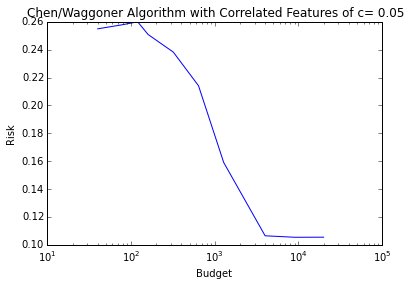

In [530]:
mech = OurMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
errs5 = [0.0]*len(budgets)
squared_errs5 = [0.0]*len(budgets)

T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_5)
    avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
    eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=1.5)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errs5[bi] += temp / float(TRIALS)
        squared_errs5[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,squared_errs5, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.05")
plt.xlabel("Budget")
plt.ylabel("Risk")

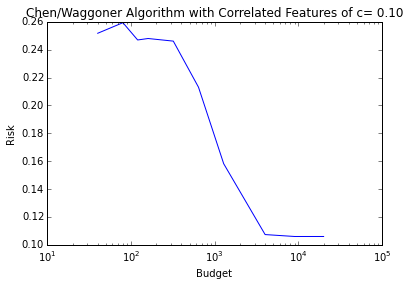

In [531]:
mech = OurMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
errs10 = [0.0]*len(budgets)
squared_errs10 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_10)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_5)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=1.6)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errs10[bi] += temp / float(TRIALS)
        squared_errs10[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,squared_errs10, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.10")
plt.xlabel("Budget")
plt.ylabel("Risk")

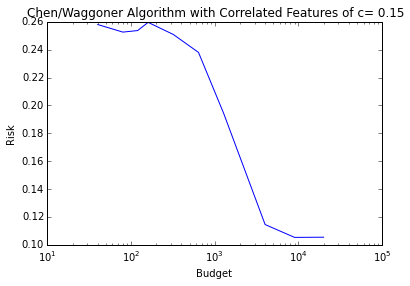

In [532]:
mech = OurMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
errs15 = [0.0]*len(budgets)
squared_errs15 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_15)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_5)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=2.5)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errs15[bi] += temp / float(TRIALS)
        squared_errs15[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,squared_errs15, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.15")
plt.xlabel("Budget")
plt.ylabel("Risk")

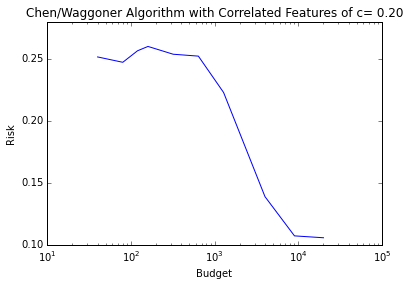

In [533]:
mech = OurMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
errs20 = [0.0]*len(budgets)
squared_errs20 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_20)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_5)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=5.0)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errs20[bi] += temp / float(TRIALS)
        squared_errs20[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,squared_errs20, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.20")
plt.xlabel("Budget")
plt.ylabel("Risk")

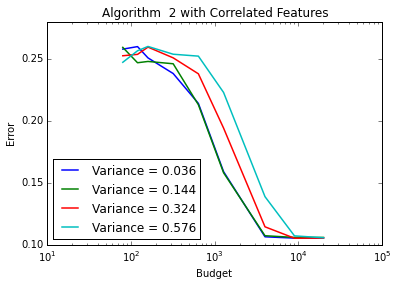

In [555]:
plt.semilogx(budgets[1:],squared_errs5[1:], linewidth=1.5, label = 'Variance = 0.036')
plt.semilogx(budgets[1:],squared_errs10[1:], linewidth=1.5, label = 'Variance = 0.144')
plt.semilogx(budgets[1:],squared_errs15[1:], linewidth=1.5, label = 'Variance = 0.324')
plt.semilogx(budgets[1:],squared_errs20[1:], linewidth=1.5, label = 'Variance = 0.576')
#plt.semilogx(budgets,errs40, linewidth=1.5, label = 'Correlation = 4.0')
plt.title("Algorithm  2 with Correlated Features")
plt.xlabel("Budget")
plt.ylabel("Error")
plt.legend(loc = 3)

In [463]:
import random
import numpy as np 

class NaiveMech(object):
    """
    This is the naive mechanism that simply posts a fixed price for all arriving
    data.
    """
    def __init__(self, alg, T=0, B=0, price_threshold=1.0):
        self.alg = alg
        self.reset(0.1, T, B, price_threshold=price_threshold)
        super(NaiveMech, self).__init__()

    # we don't need to know cmax, but for compatibility with the interface
    def reset(self, eta, T, B, cmax=1.0, price_threshold=1.0):
        self.T = T
        self.B = B
        self.price_threshold = price_threshold
        self.spend = 0.0
        self.alg.reset(eta)

    def train_and_get_err(self, costs, Xtrain, Ytrain, Xtest, Ytest):
        # train
        for i in xrange(len(Xtrain)):
            if costs[i] <= self.price_threshold:
                self.spend += self.price_threshold
                self.alg.data_update(Xtrain[i], Ytrain[i], 1.0)
                if self.spend >= self.B:
                    break
            else:
                self.alg.null_update()
        # get err
        return self.alg.test_error(Xtest, Ytest)


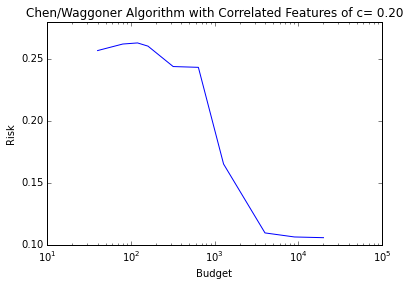

In [542]:
mech = NaiveMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
naiveerrs20 = [0.0]*len(budgets)
naivesquared_errs20 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_20)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_20)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=5.0, price_threshold = 4.0)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        naiveerrs20[bi] += temp / float(TRIALS)
        naivesquared_errs20[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,naivesquared_errs20, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.20")
plt.xlabel("Budget")
plt.ylabel("Risk")

In [541]:
cost_fts_20

array([[ 1.29291028],
       [ 0.9675083 ],
       [ 1.67851013],
       ..., 
       [ 2.26581741],
       [ 1.61031514],
       [ 2.20701709]])

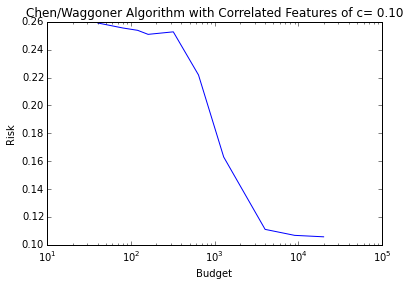

In [543]:
mech = NaiveMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())

naiveerrs10 = [0.0]*len(budgets)
naivesquared_errs10 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_10)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_10)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=4, price_threshold = 4.0)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        naiveerrs10[bi] += temp / float(TRIALS)
        naivesquared_errs10[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,naivesquared_errs10, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.10")
plt.xlabel("Budget")
plt.ylabel("Risk")

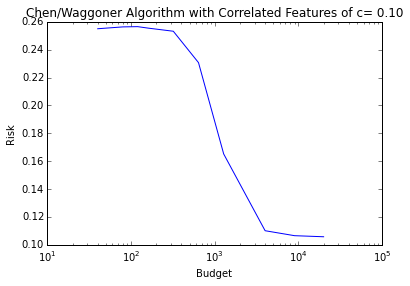

In [553]:
mech = NaiveMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
TRIALS = 100
naiveerrs5 = [0.0]*len(budgets)
naivesquared_errs5 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_5)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_5)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=4, price_threshold = 4.0)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        naiveerrs5[bi] += temp / float(TRIALS)
        naivesquared_errs5[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,naivesquared_errs5, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.10")
plt.xlabel("Budget")
plt.ylabel("Risk")

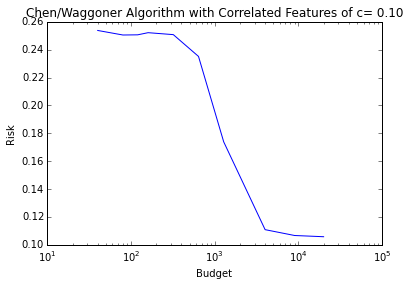

In [556]:
mech = NaiveMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())

naiveerrs15 = [0.0]*len(budgets)
naivesquared_errs15 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_15)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_15)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=4, price_threshold = 4.0)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        naiveerrs15[bi] += temp / float(TRIALS)
        naivesquared_errs15[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,naivesquared_errs15, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.10")
plt.xlabel("Budget")
plt.ylabel("Risk")

In [ ]:
max(cost_fts_5)

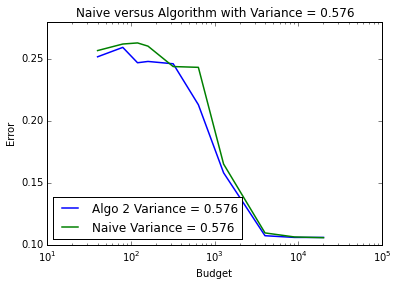

In [572]:
# plt.semilogx(budgets,squared_errs5, linewidth=1.5, label = 'Algo 2 Variance = 0.036')
plt.semilogx(budgets,squared_errs10, linewidth=1.5, label = 'Algo 2 Variance = 0.576')
# plt.semilogx(budgets,squared_errs15, linewidth=1.5, label = 'Algo 2 Variance = 0.324')
# plt.semilogx(budgets[1:],errs20[1:], linewidth=1.5, label = 'Algo 2 Variance = 0.576')
#plt.semilogx(budgets,naivesquared_errs5, linewidth=1.5, label = 'Naive  Variance = 0.036')
# plt.semilogx(budgets[1:],naiveerrs10[1:], linewidth=1.5, label = 'Naive Variance = 0.144')
#plt.semilogx(budgets,naivesquared_errs15, linewidth=1.5, label = 'Naive Variance = 0.324')
plt.semilogx(budgets,naivesquared_errs20, linewidth=1.5, label = 'Naive Variance = 0.576')
#plt.semilogx(budgets,errs40, linewidth=1.5, label = 'Correlation = 4.0')
plt.title("Naive versus Algorithm with Variance = 0.576")
plt.xlabel("Budget")
plt.ylabel("Error")
plt.legend(loc = 3)

In [ ]:
mech = NaiveMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
errs15 = [0.0]*len(budgets)
squared_errs20 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_20)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=5.0)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errs20[bi] += temp / float(TRIALS)
        squared_errs20[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,squared_errs20, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.20")
plt.xlabel("Budget")
plt.ylabel("Risk")

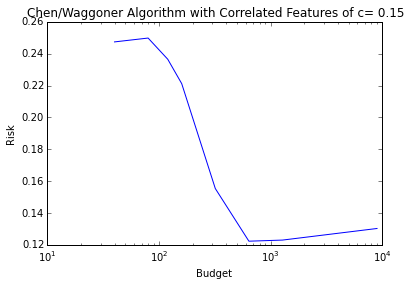

In [469]:
naiveerrs15 = [0.0]*len(budgets)
naivesquared_errs15 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_15)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts_5)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=2.5)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        naiveerrs15[bi] += temp / float(TRIALS)
        naivesquared_errs15[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,naivesquared_errs15, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.15")
plt.xlabel("Budget")
plt.ylabel("Risk")

In [462]:
np.var(cost_fts_5), np.var(cost_fts_10), np.var(cost_fts_15), np.var(cost_fts_20)

(0.036019864737890123,
 0.14407945895156049,
 0.32417878264101102,
 0.57631783580624196)

In [456]:
np.var(cost_sg_5), np.var(cost_sg_10), np.var(cost_sg_15), np.var(cost_sg_20)

(0.011387093513254523,
 0.041548698421409319,
 0.083709647469109763,
 0.13695134273257792)

In [570]:
TRIALS

100

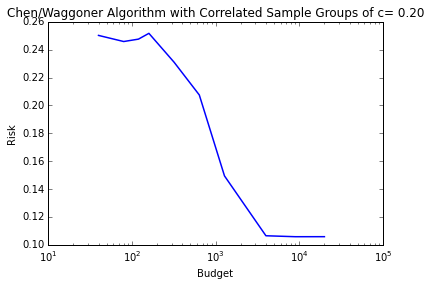

In [595]:
mech = OurMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
errssg20 = [0.0]*len(budgets)
squared_errssg20 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_20)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_20)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=1.6)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errssg20[bi] += temp / float(TRIALS)
        squared_errssg20[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,squared_errssg20, linewidth=1.5)
plt.title("Chen/Waggoner Algorithm with Correlated Sample Groups of c= 0.20")
plt.xlabel("Budget")
plt.ylabel("Risk")

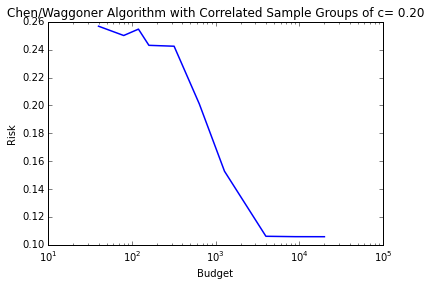

In [596]:
errssg15 = [0.0]*len(budgets)
squared_errssg15 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_15)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_15)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=1.5)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errssg15[bi] += temp / float(TRIALS)
        squared_errssg15[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,squared_errssg15, linewidth=1.5)
plt.title("Chen/Waggoner Algorithm with Correlated Sample Groups of c= 0.20")
plt.xlabel("Budget")
plt.ylabel("Risk")

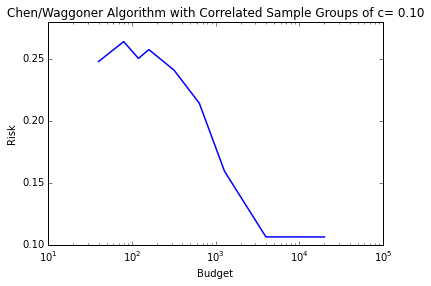

In [574]:
errssg10 = [0.0]*len(budgets)
squared_errssg10 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_10)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=1.4)
        (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_10)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errssg10[bi] += temp / float(TRIALS)
        squared_errssg10[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,squared_errssg10, linewidth=1.5)
plt.title("Chen/Waggoner Algorithm with Correlated Sample Groups of c= 0.10")
plt.xlabel("Budget")
plt.ylabel("Risk")

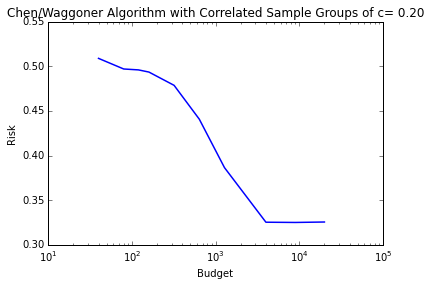

In [575]:
errssg5 = [0.0]*len(budgets)
squared_errs = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_5)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=1.3)
        (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_5)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errssg5[bi] += temp / float(TRIALS)
        squared_errs[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,errssg5, linewidth=1.5)
plt.title("Chen/Waggoner Algorithm with Correlated Sample Groups of c= 0.20")
plt.xlabel("Budget")
plt.ylabel("Risk")

In [608]:
np.var(cost_sg_5)

0.040544050096685859

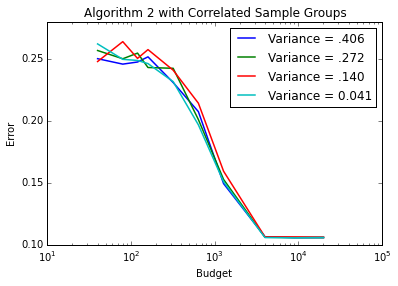

In [610]:
plt.semilogx(budgets,squared_errssg20, linewidth=1.5, label = 'Variance = .406')
plt.semilogx(budgets,squared_errssg15, linewidth=1.5, label = 'Variance = .272')
plt.semilogx(budgets,squared_errssg10, linewidth=1.5, label = 'Variance = .140')
plt.semilogx(budgets,squared_errs, linewidth=1.5, label = 'Variance = 0.041')
plt.title("Algorithm 2 with Correlated Sample Groups ")
plt.xlabel("Budget")
plt.ylabel("Error")
plt.legend()

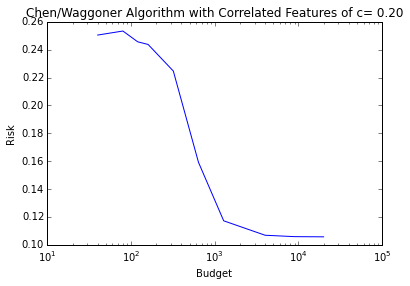

In [593]:
mech = NaiveMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
naiveerrssg20 = [0.0]*len(budgets)
naivesquared_errssg20 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_20)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_20)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=5.0, price_threshold = 2.0)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        naiveerrssg20[bi] += temp / float(TRIALS)
        naivesquared_errssg20[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,naivesquared_errssg20, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.20")
plt.xlabel("Budget")
plt.ylabel("Risk")

1.8585215711499132

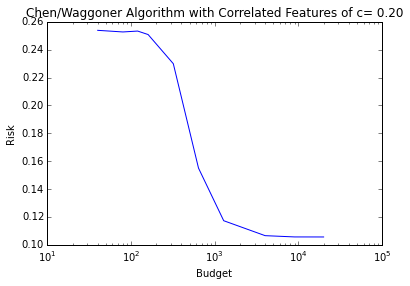

In [592]:
mech = NaiveMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())
naiveerrssg15 = [0.0]*len(budgets)
naivesquared_errssg15 = [0.0]*len(budgets)

(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_15)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg_15)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=5.0, price_threshold = 2.0)
        temp = mech.train_and_get_err([sum(i) for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        naiveerrssg15[bi] += temp / float(TRIALS)
        naivesquared_errssg15[bi] += temp*temp / float(TRIALS)

plt.semilogx(budgets,naivesquared_errssg15, linewidth=1.0)
plt.title("Chen/Waggoner Algorithm with Correlated Features of c= 0.20")
plt.xlabel("Budget")
plt.ylabel("Risk")

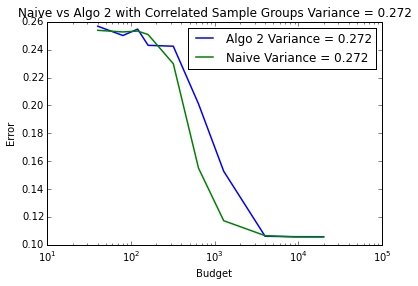

In [605]:
plt.semilogx(budgets,squared_errssg15, linewidth=1.5, label = 'Algo 2 Variance = 0.272')
# plt.semilogx(budgets,squared_errssg20, linewidth=1.5, label = 'Algo 2 Variance = 0.406')
# plt.semilogx(budgets,squared_errssg15, linewidth=1.5, label = 'Correlation = 1.5')
# plt.semilogx(budgets,squared_errssg10, linewidth=1.5, label = 'Correlation = 1.0')
# plt.semilogx(budgets,squared_errs, linewidth=1.5, label = 'Correlation = 0.5')
plt.semilogx(budgets,naivesquared_errssg15, linewidth=1.5, label = 'Naive Variance = 0.272')
# plt.semilogx(budgets,naivesquared_errssg20, linewidth=1.5, label = 'Naive Variance = 0.406')

plt.title("Naive vs Algo 2 with Correlated Sample Groups Variance = 0.272")
plt.xlabel("Budget")
plt.ylabel("Error")
plt.legend(loc = 0)

In [599]:
np.var(cost_sg_20)

0.40557220204313077

In [351]:
from sklearn import linear_model

In [352]:
regr = linear_model.LinearRegression()

In [491]:
regr.fit(Xtrain[:20],Ytrain[:20])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [492]:
regr.coef_

array([ 0.66944114,  0.53785202,  0.86604821, -0.23404541,  1.2675027 ])

In [493]:
h_lr

array([[ 0.39651236],
       [ 0.41233631],
       [ 0.48626399],
       [ 0.19416273],
       [ 0.80741692]])

In [494]:
np.mean( (regr.predict(Xtest) - Ytest)**2)

0.11872224675918625

In [490]:
len(Ytest)

4999

<bound method LinearRegression.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>